<a href="https://colab.research.google.com/github/Danil1D/KSVD/blob/main/%D0%94%D0%B0%D1%88%D0%BA%D0%B5%D0%B2%D0%B8%D1%87_%D0%9B%D0%B0%D0%B1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [100/1000], Loss: 0.6343
Epoch [200/1000], Loss: 0.5886
Epoch [300/1000], Loss: 0.5565
Epoch [400/1000], Loss: 0.5327
Epoch [500/1000], Loss: 0.5139
Epoch [600/1000], Loss: 0.4985
Epoch [700/1000], Loss: 0.4855
Epoch [800/1000], Loss: 0.4742
Epoch [900/1000], Loss: 0.4644
Epoch [1000/1000], Loss: 0.4557

Torch Logistic Regression Accuracy: 0.8504273504273504
[[204  27]
 [ 43 194]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       231
           1       0.88      0.82      0.85       237

    accuracy                           0.85       468
   macro avg       0.85      0.85      0.85       468
weighted avg       0.85      0.85      0.85       468

Sklearn Logistic Regression Accuracy: 0.8931623931623932
[[207  24]
 [ 26 211]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       231
           1       0.90      0.89      0.89       237

    accuracy                           

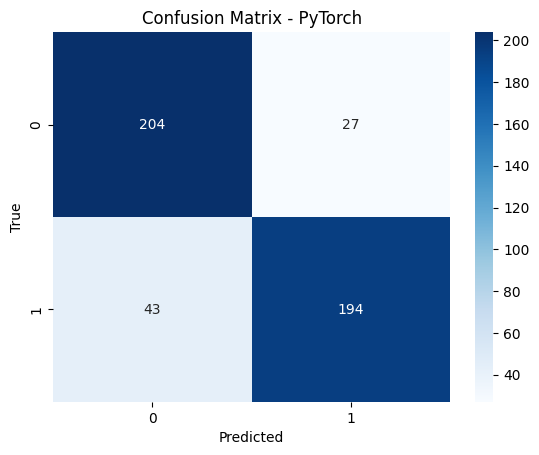

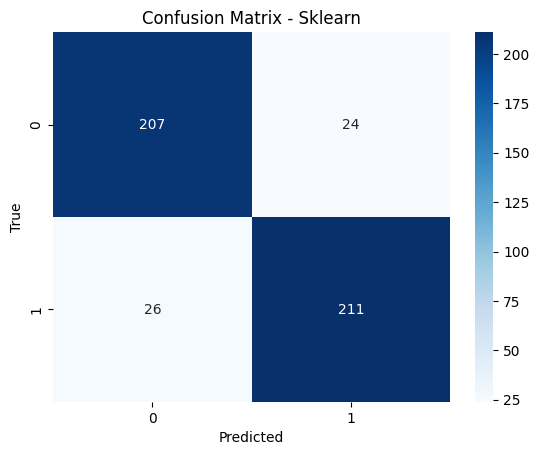


У лабораторній роботі було реалізовано логістичну регресію за допомогою PyTorch та sklearn.
Обидві моделі дали подібну точність. Для оцінки використовувалися метрики точності, precision,
recall, F1-score та матриця плутанини. PyTorch-модель показала гнучкість і готова до розширення.
Робота дозволила закріпити знання з побудови, навчання та оцінки моделей класифікації.



In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")
X = df.drop("Cured", axis=1).values
y = df["Cured"].values

gsc = StandardScaler()
X_scaled = gsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = LogisticRegressionModel(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}")

model.eval()
y_pred_probs = model(X_test_tensor).detach().numpy()
y_pred_classes = (y_pred_probs >= 0.5).astype(int)

print("\nTorch Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_test)

print("Sklearn Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print(confusion_matrix(y_test, y_pred_sklearn))
print(classification_report(y_test, y_pred_sklearn))

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, y_pred_classes, "Confusion Matrix - PyTorch")
plot_conf_matrix(y_test, y_pred_sklearn, "Confusion Matrix - Sklearn")

print("""
У лабораторній роботі було реалізовано логістичну регресію за допомогою PyTorch та sklearn.
Обидві моделі дали подібну точність. Для оцінки використовувалися метрики точності, precision,
recall, F1-score та матриця плутанини. PyTorch-модель показала гнучкість і готова до розширення.
Робота дозволила закріпити знання з побудови, навчання та оцінки моделей класифікації.
""")
